In [55]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

# Homework 1

## 1

In [68]:
deg=20

In [69]:
G=nx.empty_graph(deg)

## 2 Freeman formula using degree centrality

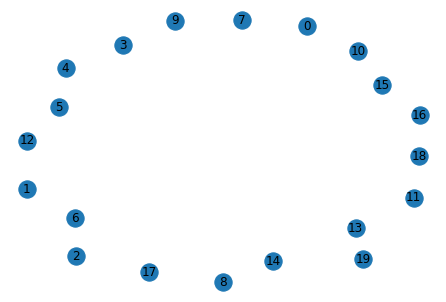

In [70]:
nx.draw(G, with_labels=True)
plt.show()

## 3

In [75]:
Freeman=np.zeros(deg*(deg-1)//2)

In [81]:
for i in range(len(Freeman)):
    nonedges = list(nx.non_edges(G))
    to_add=random.choice(nonedges)
    G.add_edge(to_add[0],to_add[1])
    centrality=nx.closeness_centrality(G)
    Freeman[i]=(deg*max(centrality.values())-sum(centrality.values()))/(deg-2)

## 4

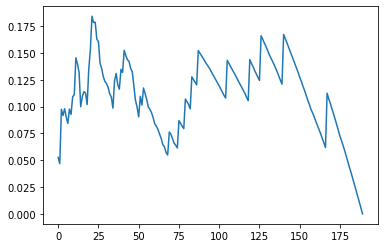

In [83]:
plt.plot(np.arange(0,deg*(deg-1)//2,1),Freeman)

# Homework 2

# Homework 3

# Homework 4